In [1]:
pip install geopandas matplotlib

In [2]:
#Librerías para el manejo de datos
import pandas as pd
import numpy as np

#Librerías para la visualización de los datos
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns


# Expresiones regulares
import re
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

#Para la visualización de datos mundiales
import geopandas as gpd


c:\Users\usuario\Anaconda2\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
df_ev=pd.read_csv(r"C:\Users\usuario\Desktop\Master Data Analytics\PROYECTO FINAL - HEALTH ANALYTICS\Dato\life_expectancy.csv")

In [4]:
#Una vez importados los datos analizamos por encima los df
def check_df(df):
    print("Cuál es la forma del dataframe?")
    display(df.shape)
    print("\n------------------------------------------------------------------------------------------------------------------------------------")
    print("Cuáles son las columnas del dataframe?")
    print(df.columns)
    print("\n------------------------------------------------------------------------------------------------------------------------------------")
    print("Cuáles son las primeras 5 filas del dataframe?")
    display(df.head())
    print("\n------------------------------------------------------------------------------------------------------------------------------------")
    print("Cuáles son las 5 últimas filas?")
    display(df.tail())
    print("\n------------------------------------------------------------------------------------------------------------------------------------")
    print("Muéstrame 5 filas aleatorias del dataframe")
    display(df.sample(5))
    print("\n------------------------------------------------------------------------------------------------------------------------------------")
    print("Información sobre la tipología de datos:")
    print(df.dtypes)
    print("\n------------------------------------------------------------------------------------------------------------------------------------")
    print("Principales datos estadísticos:")
    display(df.describe())
    print("\n------------------------------------------------------------------------------------------------------------------------------------")
    print("Existen columnas con valores nulos?")
    print(df.isnull().sum())
    print("\n------------------------------------------------------------------------------------------------------------------------------------")
    print("Existen columnas con valores duplicados?")
    print(df.duplicated().sum())


In [5]:
check_df(df_ev)

Cuál es la forma del dataframe?


(20755, 4)


------------------------------------------------------------------------------------------------------------------------------------
Cuáles son las columnas del dataframe?
Index(['Entity', 'Code', 'Year',
       'Period life expectancy at birth - Sex: all - Age: 0'],
      dtype='object')

------------------------------------------------------------------------------------------------------------------------------------
Cuáles son las primeras 5 filas del dataframe?


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258



------------------------------------------------------------------------------------------------------------------------------------
Cuáles son las 5 últimas filas?


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
20750,Zimbabwe,ZWE,2017,60.7095
20751,Zimbabwe,ZWE,2018,61.4141
20752,Zimbabwe,ZWE,2019,61.2925
20753,Zimbabwe,ZWE,2020,61.1242
20754,Zimbabwe,ZWE,2021,59.2531



------------------------------------------------------------------------------------------------------------------------------------
Muéstrame 5 filas aleatorias del dataframe


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
10324,"Less developed regions, excluding China",NaN,1988,58.6052
4401,Czechia,CZE,1900,40.2660
13949,Northern Mariana Islands,MNP,1982,69.3920
12802,Namibia,NAM,1986,59.5549
1520,Barbados,BRB,1952,55.8801



------------------------------------------------------------------------------------------------------------------------------------
Información sobre la tipología de datos:
Entity                                                  object
Code                                                    object
Year                                                     int64
Period life expectancy at birth - Sex: all - Age: 0    float64
dtype: object

------------------------------------------------------------------------------------------------------------------------------------
Principales datos estadísticos:


,Year,Period life expectancy at birth - Sex: all - Age: 0
count,20755.000000,20755.000000
mean,1975.730234,61.617992
std,38.423230,12.917682
min,1543.000000,11.995100
25%,1961.000000,52.185850
50%,1981.000000,64.060000
75%,2001.000000,71.822250
max,2021.000000,86.542400



------------------------------------------------------------------------------------------------------------------------------------
Existen columnas con valores nulos?
Entity                                                    0
Code                                                   1694
Year                                                      0
Period life expectancy at birth - Sex: all - Age: 0       0
dtype: int64

------------------------------------------------------------------------------------------------------------------------------------
Existen columnas con valores duplicados?
0


### Cuál es el número de países?

In [6]:
#Existen 261 países 
print(f"Existen {df_ev['Entity'].nunique()} países")

Existen 261 países


### Analizamos las celdas con valores nulos

In [7]:
df_null=df_ev[df_ev["Code"].isnull()]
df_null.head()

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
72,Africa,NaN,1950,37.6235
73,Africa,NaN,1951,37.9309
74,Africa,NaN,1952,38.4430
75,Africa,NaN,1953,38.9152
76,Africa,NaN,1954,39.2991


In [8]:
#Visualizmos los países que no tienen código
print(df_null["Entity"].unique())
print(df_null["Entity"].nunique())

['Africa' 'Americas' 'Asia' 'England and Wales' 'Europe'
 'High-income countries' 'Land-locked Developing Countries (LLDC)'
 'Latin America and the Caribbean' 'Least developed countries'
 'Less developed regions' 'Less developed regions, excluding China'
 'Less developed regions, excluding least developed countries'
 'Low-income countries' 'Lower-middle-income countries'
 'Middle-income countries' 'More developed regions'
 'No income group available' 'Northern America' 'Northern Ireland'
 'Oceania' 'Scotland' 'Small Island Developing States (SIDS)'
 'Upper-middle-income countries']
23


Existen 23 países  sin código. Si nos fijamos en general son grupos de países así que podemos excuirlos o analizarlos de manera aislada para poder obtener insihgts valiosos.

In [9]:
#Procedemos a analizar los países excluyendo las celdas que tienen valores nulos
df=df_ev[df_ev["Code"].notnull()]

In [10]:
df.head()

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258


Cuál es el país con mayor y menor esperanza de vida?

In [11]:
df.sort_values(by="Period life expectancy at birth - Sex: all - Age: 0", ascending=False).head()

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
12258,Monaco,MCO,2019,86.5424
12259,Monaco,MCO,2020,86.5380
12257,Monaco,MCO,2018,86.4643
12260,Monaco,MCO,2021,85.9463
12255,Monaco,MCO,2016,85.7228


Cuál es el país con menor esperanza de vida?

In [12]:
df.sort_values(by="Period life expectancy at birth - Sex: all - Age: 0").head()

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
2894,Cambodia,KHM,1975,11.9951
2895,Cambodia,KHM,1976,12.0128
17392,South Sudan,SSD,1988,12.4073
13665,North Korea,PRK,1950,13.8211
15488,Rwanda,RWA,1994,14.0985


Si analizamos la esperanza de vda dejando de lado el espacio temporal los valores máximos los alcanza  Mónaco y los mínimos Cambodia.  Los mayores valores de esperanza de vida vienen determinados en general por la renta y los estilos de vida. En el caso de los valores mínimos aparte de los factores económicos debemos de tener en cuenta la existencia de conflictos bélicos.

### Para hacer un anásis más justo vamos establecer intervalos de tiempo 

In [13]:
#Primero vamos a ver el número de países a lo largo de los años
df_year=df.groupby("Year")["Code"].nunique().reset_index()
df_year.head()

,Year,Code
0,1543,1
1,1548,1
2,1553,1
3,1558,1
4,1563,1


In [14]:
px.line(
    data_frame=df_year,
    y="Code",
    x="Year",
    )

Tal y como puede visualizarse en el gráfico, la mayoría de los países tienen datos desde 1950 así que analizaremos los datos desde ahí en adelante.

### Relación entre el nivel de ingresos de los países y la esperanza de vida

In [15]:
income_filter=["High-income countries","Upper-middle-income countries", "Middle-income countries", "Lower-middle-income countries", "Low-income countries", "No income group available"]

df_income=df_ev[df_ev["Entity"].isin(income_filter)]
df_income.head()

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
7731,High-income countries,NaN,1950,61.5421
7732,High-income countries,NaN,1951,62.5624
7733,High-income countries,NaN,1952,64.3204
7734,High-income countries,NaN,1953,64.9871
7735,High-income countries,NaN,1954,65.9261


In [16]:
px.line(
    data_frame=df_income,
    y="Period life expectancy at birth - Sex: all - Age: 0",
    x="Year",
    color="Entity"
    )


Como podemos vern el el gráfico el nivel de ingreoss tiene una relación positiva con la esperanza de vida, ya que los valores más altos siempre se encuentran en los países con mayores ingresos.  Además, podemos apreciar que a lo largo del tiempo la esperanza de vida va aumentando. Uno de los múltiples factores, pueden ser los avances en el sector sanitario.

Además, a partir del año 2020 podemos ver que hay una disminución en general. Esto se explicaría en gran parte por el impacto del Covid.

### Relación entre el nivel de desarrollo de los países y el nivel de renta

In [17]:
# Procedemos a ver el impacto del desarrollo en la esperanza de vida
dev_filter=["More developed regions", "Less developed regions", "Least developed countries"]
df_dev=df_ev[df_ev["Entity"].isin(dev_filter)]
df_dev.head()



,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
9998,Least developed countries,NaN,1950,36.7606
9999,Least developed countries,NaN,1951,37.1166
10000,Least developed countries,NaN,1952,37.6441
10001,Least developed countries,NaN,1953,38.0314
10002,Least developed countries,NaN,1954,38.5840


In [18]:
px.line(
    data_frame=df_dev,
    y="Period life expectancy at birth - Sex: all - Age: 0",
    x="Year",
    color="Entity"
    )

Los insights que obtenemos son los mismos que con los ingresos. El nivel de desarrrollo del país tienen una relación positiva con la esperanza de vida. Además, a lo largo del tiempo la esperanza de vida aumenta.

### Niveles de esperanza de vida por continente

In [19]:
continentes=["Africa", "Americas", "Asia", "Europe"]
df_continentes=df_ev[df_ev["Entity"].isin(continentes)]
df_cont_year=df_continentes[df_continentes["Year"]>=1950]
df_cont_year.head()


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
72,Africa,NaN,1950,37.6235
73,Africa,NaN,1951,37.9309
74,Africa,NaN,1952,38.4430
75,Africa,NaN,1953,38.9152
76,Africa,NaN,1954,39.2991


In [20]:
px.line(
    data_frame=df_cont_year,
    y="Period life expectancy at birth - Sex: all - Age: 0",
    x="Year",
    color="Entity"
    )

Analizando por continentes podemos ver un gran gap entre Europa y África y no exite una conversión a lo largo del tiempo. En cambio, Tanto Asia como America si acortan esa diferencia con el paso de los años. La gran disminución de Asia en los años 60 es debido a la guerra de Viednam/Camboia

### Siguiente paso: analizar los países que componen esos confinentes para poder obtener insights más valiosos

Para este paso la mejor idea sería crear una herramienta de visualización (Power BI y Tableu) para poder visualizar la evolución de los datos de los países en el tiempo

In [3]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [4]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


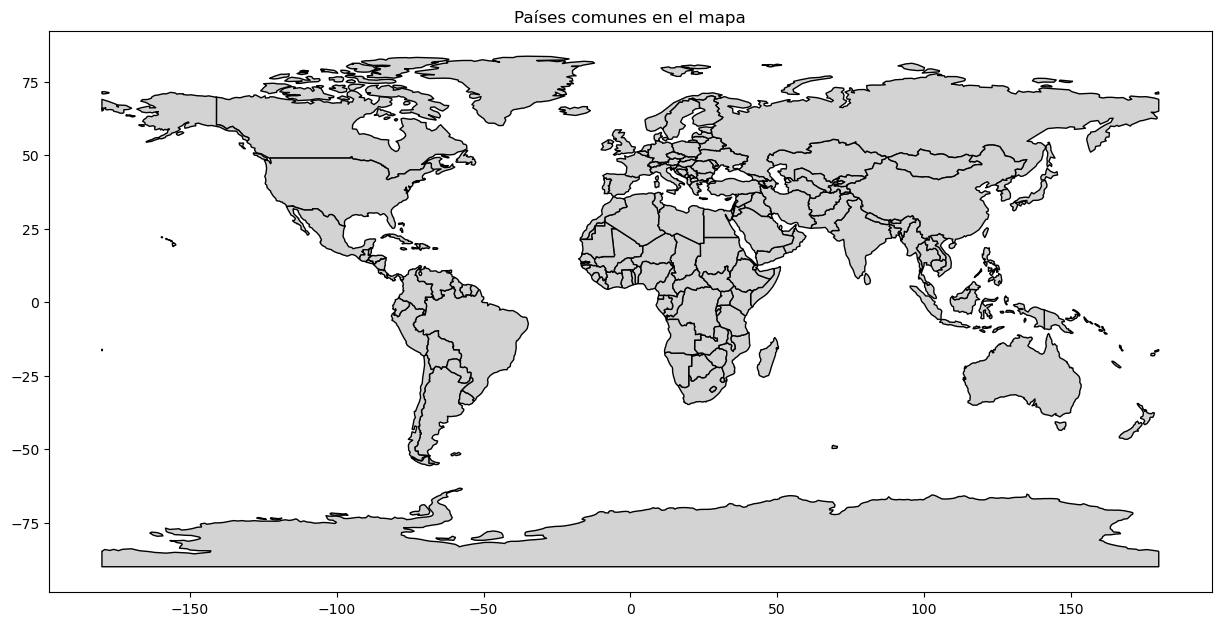

In [44]:
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
#common_countries_gdf.plot(ax=ax, color='blue', edgecolor='black')
plt.title('Países comunes en el mapa')
plt.show()